In [1]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
y = df['price']
X = df.drop('price', axis=1)

X = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)

X.head()

,Unnamed: 0,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4,0.29,62.4,58.0,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [9]:
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
print(X.columns)

Index(['Unnamed_0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(43152, 24) (10788, 24)


In [11]:
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1543
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 24
[LightGBM] [Info] Start training from score 3939.490707


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

score_train = lgbm.score(X_train, y_train)
print(f'Train score: {score_train:.5f}')


score_test = lgbm.score(X_test, y_test)
print(f'Test score: {score_test:.5f}')

MAE: 29.821225333134645
MSE: 2727.300633188537
RMSE: 52.22356396482853
Train score: 0.99985
Test score: 0.99983


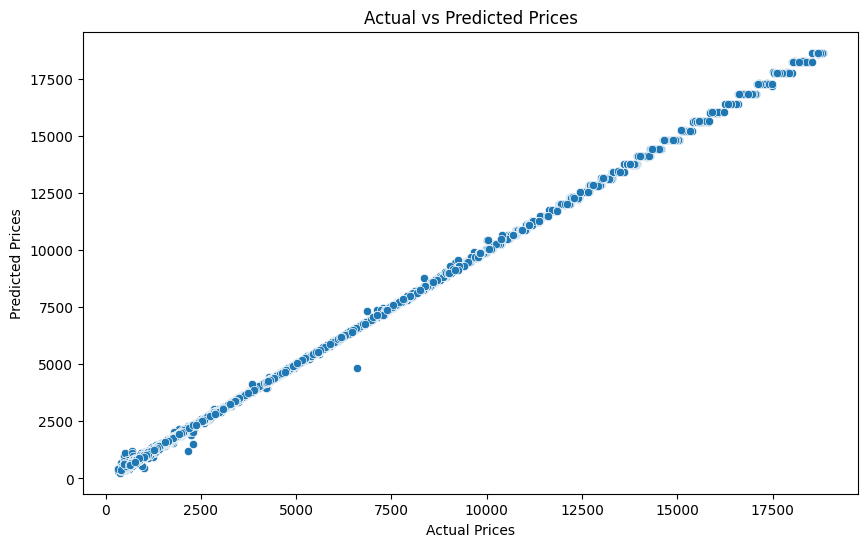

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

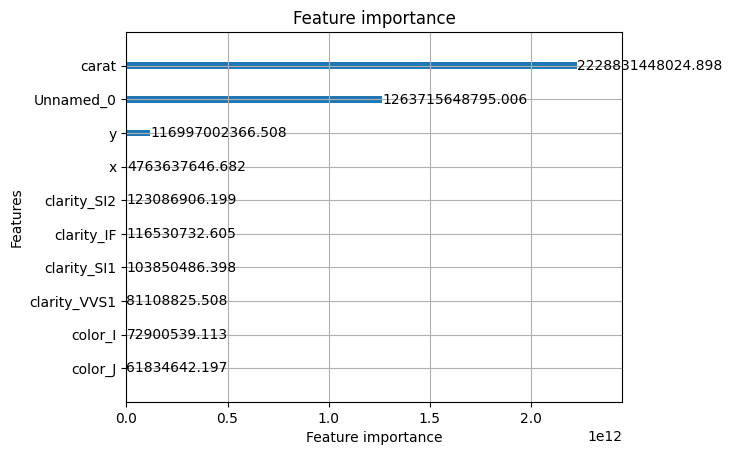

In [14]:
lgb.plot_importance(lgbm, max_num_features=10, importance_type='gain')
plt.show()

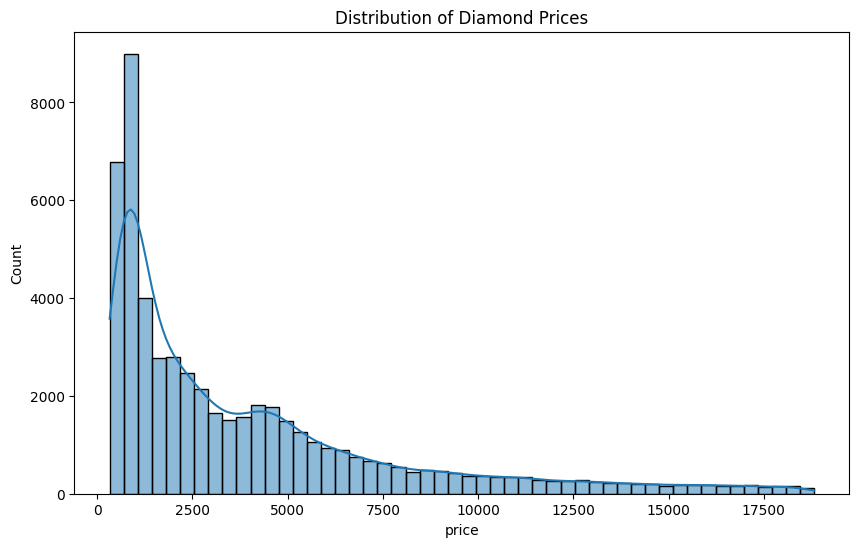

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.show()